# The Jaynes-Cummings model with damping

In this notebook you will build upon what you did in the first notebook. The main new extension will be to add  damping (loss of energy) to the dynamics.

## Background

The content of this cell is background information to help you understand where the formalism for describing damping is coming from. For more information we recommend the book "Open Quantum Systems" by Breuer and Petruccione and/or Chapters 2 and 8 of "Quantum Computation and Quantum Information" by Nielsen and Chuang.


When we deal with _open_ quantum systems where energy can flow in and out (as opposed to a _closed_ quantum system) the dynamics is no longer described by a Schrödinger equation, and the state of the system can in general be a _mixed_ state. Let's look at the latter concept first.

### Mixed states

A mixed state can be interpreted as a probability distribution $p_k$ over a set of states $|\psi_k\rangle$. Mathematically, we represent the state by an operator

$$
\rho = \sum_k p_k |\psi_k\rangle\langle\psi_k|
$$

Since $p_k$ is a probability distribution, $p_k\ge 0, \sum_k p_k = 1$, we have that

$$
\text{tr} \rho = \sum_k p_k \text{tr}\left[|\psi_k\rangle\langle\psi_k|\right] = \sum_k p_k = 1.
$$

(The trace is defined as $\text{tr}[X] = \sum_i \langle i|X|i\rangle$ where $|i\rangle$ is any orthogonal basis. It is a well defined operation even for infintie dimensional Hilbert spaces like a harmonic oscillator.)

It is moreover easy to show that
$$
\langle \psi|\rho|\psi\rangle \ge 0,
$$
for any $|\psi\rangle$. Thus $\rho$ is a _positive_ (or more precisely positive semidefinite) operator, which we denote by $\rho \ge 0$. The two conditions $\text{tr}\rho = 1$ and $\rho \ge 0$ are the only requirements for $\rho$ to represent a valid quantum state.

The expectation value of any operator is given by
$$
\langle X \rangle = \text{tr}[X\rho] = \sum_k p_k \text{tr}\left[X|\psi_k\rangle\langle\psi_k|\right]
= \sum_k p_k \langle \psi_k|X|\psi_k\rangle,
$$
hence the interpretation as a mixture / probability distribution over the states $|\psi_k\rangle$.

If $p_k=1$ for some $k$ and zero otherwise, then $\rho = |\psi_k\rangle\langle \psi_k|$, and the state is called _pure_.

### Dynamics

Now let's look at how mixed states evolve in time. The most general type of quantum evolution from some initial time $t_0$ to a final time $t_f$ is given by maps that can be written on the following form

$$
\rho(t_f) = \sum_i A_i \rho(t_0) A_i^\dagger,
$$

where the operators $A_i$ only need to satisfy a single constraint: $\sum_i A_i^\dagger A_i$. This conditions guarantees that $\text{tr}\rho(t_f) = \text{tr}\rho(t_i)$ and moreover that $\rho(t_f) \ge 0$ if $\rho(t_i) \ge 0$, so that if $\rho(t_0)$ is a valid quantum state, then so is $\rho(t_f)$. (In fact, it implies something even stronger than that, namely that the map is "completely positive", see Chapter 8.2.3 of Nielsen & Chuang.)

We are, however, not just interested in how a state evolves from some initial time to some fixed final time. We want to describe a _continuous_ time evolution. We therefore set $t_i = t$, $t_f = t + \Delta t$ in the above equation, and ask that the time derivative

$$
\dot \rho(t) = \lim_{\Delta t \to 0} \frac{\rho(t+\Delta t) - \rho(t)}{\Delta t},
$$

be well defined. For $\dot \rho$ to be finite, we choose

$$
A_i = \sqrt{\Delta t} c_i
$$

for all but one operator, say $A_0$, which can be fixed by the requirement $\sum_i A_i^\ddagger A_i = I$. It is sufficient that this holds in the limit $\Delta t \to 0$, so that we can take

$$
A_0 = I - \frac{\Delta t}{2} \sum_{i\neq 0} c_i^\dagger c_i - i \Delta t H,
$$

where $H$ is Hermitian. Plugging this in, we find

$$
\rho(t+\Delta t) = \Delta t \sum_i c_i \left[ \rho(t) c_i^\dagger - \frac12 c_i^\dagger c_i \rho(t) - \frac12 \rho(t) c_i^\dagger c_i \right] - \Delta t\left[ i H \rho(t) - i \rho H(t) \right] + \mathcal O(\Delta t^{2})
$$


leading to

$$
\dot \rho = -i[H,\rho] + \sum_i \left( c_i \rho c_i^\dagger - \frac12 c_i^\dagger c_i \rho - \frac12 \rho c_i^\dagger c_i\right).
$$ 

This equation is known as a master equation, a term that originates from classical probability theory. It is also sometimes called the Gorini–Kossakowski–Sudarshan–Lindblad equation, or frequently just (unfairly) the Lindbald equation. GKSL showed that this is the most general form of Markovian time-evolution for a quantum system. Markovian means that the evolution is "memoryless," i.e., it the state at a given time $\rho(t)$ entirely determines the state for all later times. 

The operators $c_i$ are sometimes called "collapse operators" (because they collapse the wavefunction) or "jump operators" (because they cause "quantum jumps"). If all $c_i=0$ we get the usual von-Neumann equation.

# Solving the Master equation in QuTiP

QuTiP can solve master equations using the function `mesolve` ("master equation solve"). The syntax is very similar to `sesolve` which you used in Notebook 1. The main difference is that `mesolve` takes an additional argument `c_ops` which is a list of collapse operators `c_ops = [c1, c2, c3, ..., cn]`. `mesolve` then solves the corresponding Master equation given by

$$
\dot \rho = -i[H,\rho] + \sum_i \left( c_i \rho c_i^\dagger - \frac12 c_i^\dagger c_i \rho - \frac12 \rho c_i^\dagger c_i\right).
$$ 

### Exercise 1:

Import qutip and use `help` to figure out the syntax of `mesolve`. Then solve the following master equation for a qubit:

$$
\dot \rho = -i[H,\rho] + \gamma \left( \sigma_- \rho \sigma_+ - \frac12 \sigma_+\sigma_- \rho - \frac12 \rho \sigma_+\sigma_-\right).
$$ 

with $H=\omega_a \sigma_z/2$. Use the excited state $|e\rangle$ as an initial state, and plot $\langle\sigma_z\rangle$ as a function of time for parameters $\omega_a=1$, $\gamma=0.1$.

Then try different values of $\omega_a$. Can you explain the dependence on $\omega_a$? (Hint: Try solving for $\langle\sigma_z\rangle$(t) analtyically).

You might also find it interesting to try different values of $\gamma$ and plot $\langle \sigma_z \rangle + 1$ on a semilog scale.

Can you give a physical interpretation of $\gamma$?

In [12]:
# Solution

import numpy as np
import matplotlib.pyplot as plt

import qutip as qt

%matplotlib inline

help(qt.mesolve)

Help on function mesolve in module qutip.mesolve:

mesolve(H, rho0, tlist, c_ops=None, e_ops=None, args=None, options=None, progress_bar=None, _safe_mode=True)
    Master equation evolution of a density matrix for a given Hamiltonian and
    set of collapse operators, or a Liouvillian.
    
    Evolve the state vector or density matrix (`rho0`) using a given
    Hamiltonian or Liouvillian (`H`) and an optional set of collapse operators
    (`c_ops`), by integrating the set of ordinary differential equations
    that define the system. In the absence of collapse operators the system is
    evolved according to the unitary evolution of the Hamiltonian.
    
    The output is either the state vector at arbitrary points in time
    (`tlist`), or the expectation values of the supplied operators
    (`e_ops`). If e_ops is a callback function, it is invoked for each
    time in `tlist` with time and the state as arguments, and the function
    does not use any return values.
    
    If eithe

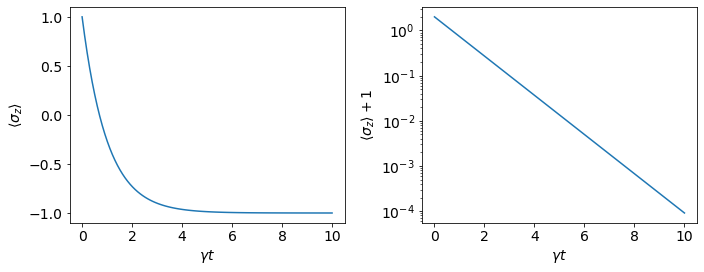

In [120]:
# Solution contd.

w = 1.0
gamma = 1.0

H = w*qt.sigmaz()
psi0 = qt.basis(2, 0)
c_ops = [np.sqrt(gamma)*qt.sigmam()]

tlist = np.linspace(0, int(10/gamma), 100)
sol = qt.mesolve(H, psi0, tlist, c_ops=c_ops)

sz = qt.expect(qt.sigmaz(), sol.states)

fig = plt.figure(figsize=(10, 4))
plt.rc('font', size=14)  # Use a larger font size than the default 10pt
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

ax.plot(gamma*tlist, sz, '-')
bx.semilogy(gamma*tlist, sz+1, '-')
ax.set_xlabel(r'$\gamma t$')
ax.set_ylabel(r'$\langle \sigma_z\rangle$')
bx.set_xlabel(r'$\gamma t$')
bx.set_ylabel(r'$\langle \sigma_z\rangle + 1$')

fig.tight_layout()

### Exercise 2:

Let's return to the Jaynes-Cummings model from Notebook 1

$$
H_{JC} = \omega a^{\dagger} a + \frac{\omega_a}{2} \sigma_z + g (a \sigma_+ + a^\dagger \sigma_-).
$$

We will focus on the case $\omega=\omega_a$ in our numerics. Before we continue, it is convenient to solve this proglem in a rotating frame, defined by a unitary transformation with

$$
U = \exp\left[-i(\omega a^\dagger a + \omega_a \sigma_z/2)t\right]
$$

such that

$$
H_U = U^\dagger H_{JC} U - i U^\dagger \dot U = g (a \sigma_+ e^{i\Delta t} + a^\dagger \sigma_- e^{-i\Delta t})
$$

where $\Delta = \omega_a-\omega$.

Include damping (energy loss) for both the cavity mode and the atom through a master equation

$$
\dot \rho = -i[H_U,\rho] + \gamma \left( \sigma_- \rho \sigma_+ - \frac12 \sigma_+\sigma_- \rho - \frac12 \rho \sigma_+\sigma_-\right) + \kappa \left( a \rho a^\dagger - \frac12 a^\dagger a \rho - \frac12 \rho a^\dagger a\right).
$$ 

Make a series plots of

$$
\langle \sigma_z \rangle,\quad
\langle a^\dagger a \rangle
$$

as a function of time for the following parameter sets and initial states:

|       | $\Delta$ | $g$ | $\kappa$ | $\gamma$ |
|-------|------|------|------|------
| Set I | 0    |   1  |  10  |  0   |
| Set II | 0    |  1   |  0   |  10  |
| Set III | 0    | 10  | 1  | 1  |

and for each set, try two different initial states $|0,e\rangle$ and $|1,g\rangle$.

Of these three sets, which ones correspond to what we call the "strong coupling regime"?

In [64]:
# Solution

def jc_model_damped(psi0, tlist, g, kappa, gamma, nmax=5):
    """
    This function solves the Master equation for the JC model for a given initial state
    (assuming Delta = 0)
    
    psi0 = initial state
    tlist = list of times at which to compute expectation values
    g = coupling strength
    gamma = atom damping/loss rate
    kappa = photon damping/loss rate
    nmax = Hilbert space truncation (5 by default)
    
    Instead of returning the full output, the function retuns expectation values
    <sigma_z> and <a* a>
    """

    idc = qt.identity(nmax)  # identiy operator on oscillator ("c" for "cavity")
    ida = qt.identity(2)  # identity operator on atom
    
    a = qt.tensor(qt.destroy(nmax), ida)  # annihilation operator
    sz = qt.tensor(idc, qt.sigmaz())  # Pauli-z
    sm = qt.tensor(idc, qt.sigmam())  # atom lowering operator
    sp = qt.tensor(idc, qt.sigmap())  # atom raising operator
    
    HU = g * (a * sp + a.dag() * sm) # Hamiltonian
    c_ops = [np.sqrt(kappa)*a, np.sqrt(gamma)*sm] # collapse operators
    
    output = qt.mesolve(HU, psi0, tlist, c_ops=c_ops)  # solve the Master equation 
    
    return qt.expect(sz, output.states), qt.expect(a.dag()*a, output.states)

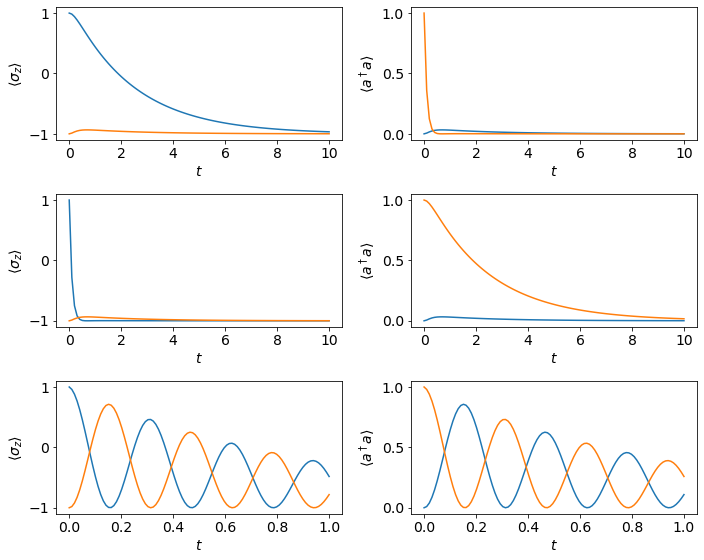

In [118]:
fig = plt.figure(figsize=(10, 8))  # create a new figure with desired size
plt.rc('font', size=14)  # Use a larger font size than the default 10pt

ax = fig.add_subplot(3, 2, 1)
bx = fig.add_subplot(3, 2, 2)
cx = fig.add_subplot(3, 2, 3)
dx = fig.add_subplot(3, 2, 4)
ex = fig.add_subplot(3, 2, 5)
fx = fig.add_subplot(3, 2, 6)


nmax = 5

ground = qt.basis(2, 1)  # atom ground state
excited = qt.basis(2, 0)  # atom excited state
 
tlist = np.linspace(0, 10, 100) 

psi0 = qt.tensor(qt.basis(nmax, 0), excited)
sz, ada = jc_model_damped(psi0, tlist, 1, 10, 0)
ax.plot(tlist, sz)
bx.plot(tlist, ada)

psi0 = qt.tensor(qt.basis(nmax, 1), ground)
sz, ada = jc_model_damped(psi0, tlist, 1, 10, 0)
ax.plot(tlist, sz)
bx.plot(tlist, ada)

psi0 = qt.tensor(qt.basis(nmax, 0), excited)
sz, ada = jc_model_damped(psi0, tlist, 1, 0, 10)
cx.plot(tlist, sz)
dx.plot(tlist, ada)

psi0 = qt.tensor(qt.basis(nmax, 1), ground)
sz, ada = jc_model_damped(psi0, tlist, 1, 0, 10)
cx.plot(tlist, sz)
dx.plot(tlist, ada)


tlist = np.linspace(0, 1, 100) 
psi0 = qt.tensor(qt.basis(nmax, 0), excited)
sz, ada = jc_model_damped(psi0, tlist, 10, 1, 1)
ex.plot(tlist, sz)
fx.plot(tlist, ada)

psi0 = qt.tensor(qt.basis(nmax, 1), ground)
sz, ada = jc_model_damped(psi0, tlist, 10, 1, 1)
ex.plot(tlist, sz)
fx.plot(tlist, ada)

ax.set_ylabel(r'$\langle \sigma_z \rangle$')
cx.set_ylabel(r'$\langle \sigma_z \rangle$')
ex.set_ylabel(r'$\langle \sigma_z \rangle$')

bx.set_ylabel(r'$\langle a^\dagger a \rangle$')
dx.set_ylabel(r'$\langle a^\dagger a \rangle$')
fx.set_ylabel(r'$\langle a^\dagger a \rangle$')

ax.set_xlabel(r'$t$')
bx.set_xlabel(r'$t$')
cx.set_xlabel(r'$t$')
dx.set_xlabel(r'$t$')
ex.set_xlabel(r'$t$')
fx.set_xlabel(r'$t$')

fig.tight_layout()